In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

(445, 479, 3)


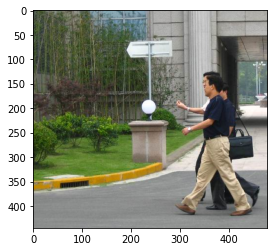

In [2]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

imagePath = "images/FudanPed00003.png"

img = cv2.imread(imagePath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

In [3]:
def human_detection(img):
    if len(img.shape) != 3: 
        raise Exception("The image must have dimension of 3!")
    if img.shape[-1] != 3: 
        raise Exception("The image must be a RGB image!")
    
    (rects, weights) = hog.detectMultiScale(img, winStride=(4, 4), padding=(2, 2), scale=1.05)

    for (x, y, w, h) in rects:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 2)
        
    return img
    
    # rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    # pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # for (xA, yA, xB, yB) in pick:
    #     cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 2)

In [4]:
image = human_detection(img)

(445, 479, 3)


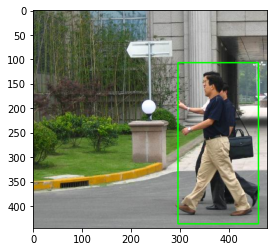

In [5]:
plt.imshow(image)
print(image.shape)

In [6]:
cap = cv2.VideoCapture('videos/WalkByShop1cor.mpg')
result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'), int(cap.get(cv2.CAP_PROP_FPS)), (int(cap.get(3)), int(cap.get(4))))
# print(cap.get(cv2.CAP_PROP_FRAME_COUNT))
ret, frame = cap.read()
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        image = human_detection(frame)
        result.write(image)
    else: 
        print("done")
        cap.release()
        result.release()
        break
        
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     i += 1
#     break
#     print(i)
#     print(frame.shape)
#     break
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

cap.release()
cv2.destroyAllWindows()

done
